Exercise 1 and 2:


In [142]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize

Use one-sided finite differences to compute an approximation to the first derivative of $g(p)=$ $0.5 p^{-0.5}+0.5 p^{-0.2}$ at $p=1.5$. Let the increment $\epsilon$ in the finite differences range across all the values in the set $\left\{10^{-1}, 10^{-2}, \ldots, 10^{-10}\right\}$. For which value of $\epsilon$ the approximate first derivative the most accurate? Repeat the third problem using two-sided finite differences to approximate the first derivative

In [86]:
def g(p):
    return 0.5*p**(-0.5) + 0.5*p**(-0.2)

In [87]:
def OSD(p, Δ):
    return (g(p+Δ) - g(p))/ Δ 

In [88]:
def TSD(p, Δ):
    return (g(p+Δ) - g(p-Δ))/ (2*Δ) 

In [89]:
OSD = np.vectorize(OSD)
TSD = np.vectorize(TSD)

In [90]:
ϵ= 10**(-1* np.linspace(1,10,10))
p_point = np.linspace(1,1,10) * 1.5
truth = -(0.5**2) * 1.5**(-1.5) - 0.5 * 0.2 * 1.5**(-1.2)

In [91]:
error_OSD = OSD(p_point, ϵ) - truth
error_TSD = TSD(p_point, ϵ) - truth

In [92]:
np.abs(error_OSD), np.abs(error_TSD)

(array([8.79174498e-03, 9.21355323e-04, 9.25811321e-05, 9.26259451e-06,
        9.26308407e-07, 9.26752449e-08, 9.85260723e-09, 8.74238421e-09,
        1.34620763e-08, 2.08582529e-07]),
 array([4.99911551e-04, 4.98240048e-06, 4.98223799e-08, 4.98557140e-10,
        6.17320084e-12, 2.83776891e-11, 1.39399992e-10, 3.19126908e-09,
        1.34620763e-08, 3.46528984e-07]))

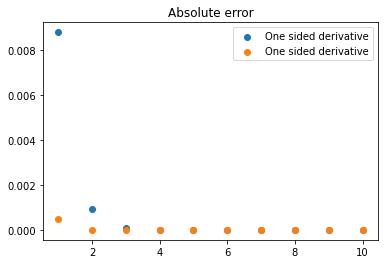

In [93]:
fig, ax  = plt.subplots()
ax.scatter(np.linspace(1,10,10), np.abs(error_OSD), label="One sided derivative")
ax.scatter(np.linspace(1,10,10), np.abs(error_TSD), label="One sided derivative")
plt.title("Absolute error")
plt.legend()
plt.show()

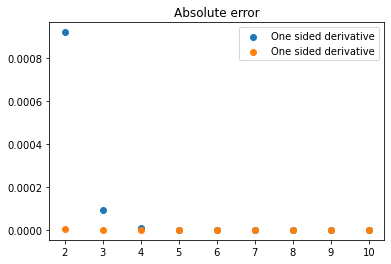

In [94]:
fig, ax  = plt.subplots()
ax.scatter(np.linspace(1,10,10)[1:], np.abs(error_OSD)[1:], label="One sided derivative")
ax.scatter(np.linspace(1,10,10)[1:], np.abs(error_TSD)[1:], label="One sided derivative")
plt.title("Absolute error")
plt.legend()
plt.show()

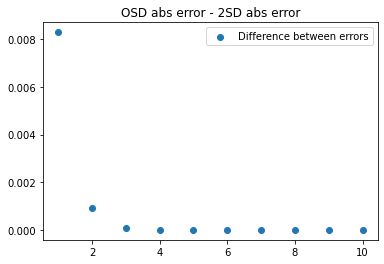

In [95]:
fig, ax  = plt.subplots()
ax.scatter(np.linspace(1,10,10),np.abs(error_OSD) - np.abs(error_TSD), label="Difference between errors")
plt.title("OSD abs error - 2SD abs error")
plt.legend()
plt.show()

In [96]:
np.min(np.abs(error_OSD)), ϵ[np.argmin(np.abs(error_OSD))]

(8.742384205451259e-09, 1e-08)

In [97]:
np.min(np.abs(error_TSD)), ϵ[np.argmin(np.abs(error_TSD))]

(6.1732008393988735e-12, 1e-05)

The minimum absolute error for the one sided derivative is achieved when $\Delta=10^{-08}$. The minimum absolute error for the two sided derivative is achieved when $\Delta=10^{-05}$. At the minimum, the Two sided derivative has a smaller absolute error compare to the One sided derivative. For a more detailed discussion see the pdf attached.

Exercises 3 and 4:

Use the bisection, secant, and Newton's methods to compute an estimate of $p_0$, where $g\left(p_0\right)=$ $0.75$ (and $g$ is defined in the first problem). For each method, report how many iterations are required to compute an estimate $\hat{p}$ satisfying $\left|f(\hat{p})-f\left(p_0\right)\right|<10^{-6}$.

Repeat the last problem using Brent's method as described in Chapter $9.3$ of Numerical Recipes in Fortran.

In [98]:
def g_tilda(p):
    return 0.5*p**(-0.5) + 0.5*p**(-0.2) - 0.75

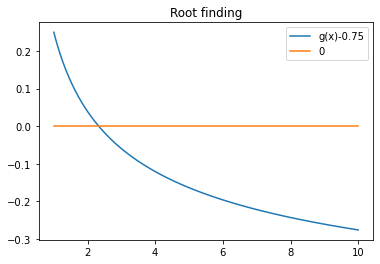

In [99]:
ax, fig = plt.subplots()
plt.plot(np.linspace(1,10,100), g_tilda(np.linspace(1,10,100)), label="g(x)-0.75")
plt.plot(np.linspace(1,10,100), g_tilda(np.linspace(1,10,100))*0, label="0")
plt.title("Root finding")
plt.legend()
plt.show()

In [100]:
precision = 10**(-6)

In [101]:
def secant(x0,x1,e,N):
    step = 1
    condition = True
    while condition:
        x2 = x0 - (x1-x0)*g_tilda(x0)/( g_tilda(x1) - g_tilda(x0) ) 
        x0 = x1
        x1 = x2
        step = step + 1
        if step > N:
            print('Max iter achieved')
            break
        condition = abs(g_tilda(x2)) > e
    print('Total Iterations ' + str( step))
    print('Root:' + str(x2))

In [102]:
secant(0.1,3,precision,100)

Total Iterations 6
Root:2.327576829233226


In [103]:
scipy.optimize.newton(g_prime, 0.1, fprime=None, args=(), tol=precision, maxiter=100, fprime2=None, x1=None, rtol=0.0, full_output=True, disp=True)

(2.3275801395267837,
       converged: True
            flag: 'converged'
  function_calls: 12
      iterations: 11
            root: 2.3275801395267837)

In [104]:
def Bisection(f, x_0, x_1, precision, steps): 
    
    if np.sign(f(x_0)) == np.sign(f(x_1)):
        raise Exception("Cannot bracket root")
    m = (x_0 + x_1)/2
    if np.abs(f(m)) < precision:
        return m, steps
    elif np.sign(f(x_0)) == np.sign(f(m)):
        return Bisection(f, m, x_1, precision, (steps + 1))
    elif np.sign(f(x_1)) == np.sign(f(m)):
        return Bisection(f, x_0, m, precision, (steps + 1))

In [105]:
Bisection(g_prime, 0.1, 3, precision, 0)

(2.3275806427001955, 17)

In [106]:
scipy.optimize.brentq(g_prime, 0.1, 3, args=(), xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=True, disp=True)

(2.3275801395268103,
       converged: True
            flag: 'converged'
  function_calls: 9
      iterations: 8
            root: 2.3275801395268103)

Iterations needed to compute ${\hat{p}}$:

|Method|Iterations|
| ---- | ----     |
|Newton's      |     11     |
|Bisection     |    17     |
|Secant        |   6      |
|Brent's      |    8  |

For a detailed explanation about what each algorithm does see attached pdf. The 2 Methods that are always well defined are Brent's and the Bisection. BIsection method is in general the slowest. When working with well behaved functions, NW is the fastest algorithm. Brent combines all of the above with an inverse quadratic equation for iterations that satisfy certain conditions.

Exercise 5

In [1]:
import quantecon as qe
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy import optimize

In [2]:
# Non stochastic economy:

# Compute the value function for the Non-stochastic economy first, and an obtain the policies. Them we can apply the algorithm for exercise a).

# Define Parameters:

n_k = np.linspace(30,500, dtype=int) # Grids for capitals
n_A = 15  # Markov States.
δ = 0.9   # Depreciation.
α = 0.7   # Capital Share.
ρ = 0.98  # Memory of income
σ = 0.00  # Volatility of income.
β = 0.98  # Discont factor.
C = 3     # Choice of grid fo capital.
θ = 1.5   # Expanding grid coefficient.
error = 10e-6 # Error tolerance.
max_iter = 1000

# Construct the markov chain using rouwenhorst method:

markov = qe.markov.approximation.rouwenhorst(n= n_A, ybar = 1-ρ, sigma=σ, rho= ρ)

# Probability matrix and states:
# note that element (i,j) of P represents the transition probability
# of going to state "j" given that we are in state "i".

Π = markov.P   
A = markov.state_values  

# Maximum sustainable Capital:

K_max = 2
K_min = 0.1

# Use and expanding grid:

K = K_min + (K_max - K_min) * (np.linspace(0, 1, n_k[C])**θ)

# Utility function

def U(c):
    if (c>=0).all()>0.0001:
        return -1*((c)**(-1))
    else:
        return np.where(c <= 0.0001, np.nan, -1*(c)**(-1))

# Convergence criteria:
#''' Inputs: Matrices of optimal capital for the n and n+1 iteration.
#    Outputs: Maximum differences between both '''
#def CC(k_0, k_1):
#    return np.nanmax()

V_0 = np.ones((n_A, n_k[C]))
V_1 = np.copy(V_0)
h_1 = np.ones((n_A, n_k[C]), dtype=int)
iter = 0

while iter < max_iter:
    for r in range(n_A):
        for c in range(n_k[C]):
            V_1[r,c] = np.nanmax(U( A[r] * K[c]**α + (1-δ) * K[c] - K) + β * Π[r,:] @ V_0)
            h_1[r,c] = np.nanargmax(U( A[r] * K[c]**α + (1-δ) * K[c] - K) + β * Π[r,:] @ V_0)
    if np.amax(np.abs(V_1 - V_0))< error:
        print("Solution Found")
        print(f'Iterations', iter)
        print(f'Error', np.amax(np.abs(V_1 - V_0)))
        break
    else:
        V_0 = np.copy(V_1)
        iter += 1
        if iter >= max_iter:
            print("No solution")

VNSS = V_1.copy()
h_NSS = h_1.copy()

Solution Found
Iterations 661
Error 9.813929978008673e-06


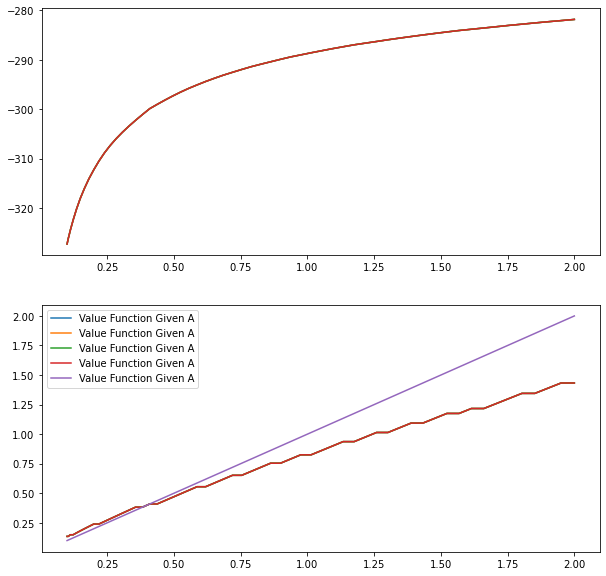

In [3]:
fig, ax  = plt.subplots(2, figsize=(10,10))
ax[0].plot(K, VNSS[3,:], label="Value Function Given A")
ax[0].plot(K, VNSS[10,:], label="Value Function Given A")
ax[0].plot(K, VNSS[5,:], label="Value Function Given A")
ax[0].plot(K, VNSS[14,:], label="Value Function Given A")
ax[1].plot(K, K[h_NSS[3,:]], label="Value Function Given A")
ax[1].plot(K, K[h_NSS[10,:]], label="Value Function Given A")
ax[1].plot(K, K[h_NSS[5,:]], label="Value Function Given A")
ax[1].plot(K, K[h_NSS[14,:]], label="Value Function Given A")
ax[1].plot(K, K, label="Value Function Given A")
plt.legend()
plt.show()


In [4]:
# Stochastic VFI:

σ = 0.01  # Volatility of income.

# Construct the markov chain using rouwenhorst method:

markov = qe.markov.approximation.rouwenhorst(n= n_A, ybar = 1-ρ, sigma=σ, rho= ρ)

# Probability matrix and states:
# note that element (i,j) of P represents the transition probability
# of going to state "j" given that we are in state "i".

Π = markov.P   
A = markov.state_values  

# Initial Values:

V_0 = np.ones((n_A, n_k[C]))
V_1 = np.copy(V_0)
h_1 = np.ones((n_A, n_k[C]), dtype=int)
iter = 0

while iter < max_iter:
    for r in range(n_A):
        for c in range(n_k[C]):
            V_1[r,c] = np.nanmax(U( A[r] * K[c]**α + (1-δ) * K[c] - K) + β * Π[r,:] @ V_0)
            h_1[r,c] = np.nanargmax(U( A[r] * K[c]**α + (1-δ) * K[c] - K) + β * Π[r,:] @ V_0)
    if np.amax(np.abs(V_1 - V_0))< error:
        print("Solution Found")
        print(f'Iterations', iter)
        print(f'Error', np.amax(np.abs(V_1 - V_0)))
        break
    else:
        V_0 = np.copy(V_1)
        iter += 1
        if iter >= max_iter:
            print("No solution")

Solution Found
Iterations 661
Error 9.994679771807569e-06


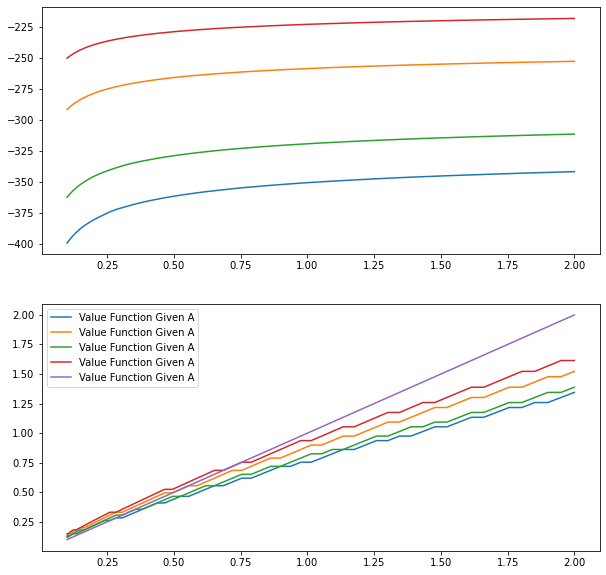

In [5]:
fig, ax  = plt.subplots(2, figsize=(10,10))
ax[0].plot(K, V_1[3,:], label="Value Function Given A")
ax[0].plot(K, V_1[10,:], label="Value Function Given A")
ax[0].plot(K, V_1[5,:], label="Value Function Given A")
ax[0].plot(K, V_1[14,:], label="Value Function Given A")
ax[1].plot(K, K[h_1[3,:]], label="Value Function Given A")
ax[1].plot(K, K[h_1[10,:]], label="Value Function Given A")
ax[1].plot(K, K[h_1[5,:]], label="Value Function Given A")
ax[1].plot(K, K[h_1[14,:]], label="Value Function Given A")
ax[1].plot(K, K, label="Value Function Given A")
plt.legend()
plt.show()

In [6]:
#Interpolation Economy:

σ = 0.01 # Volatility of income.

# Construct the markov chain using rouwenhorst method:

markov = qe.markov.approximation.rouwenhorst(n= n_A, ybar = 1-ρ, sigma=σ, rho= ρ)

# Probability matrix and states:
# note that element (i,j) of P represents the transition probability
# of going to state "j" given that we are in state "i".

Π = markov.P   
A = markov.state_values 

# Initiliaze the new code at the NSS:

V_0 = VNSS.copy()
h_0 = K[h_NSS.copy()]
h_int = np.zeros((n_A, n_k[C]), dtype=float)
V_1 = np.zeros((n_A, n_k[C]))
iter = 0

while iter < max_iter:

    for r in range(n_A):

        E_V = CubicSpline(K, Π[r,:] @ V_0 , bc_type="natural")

        for c in range(n_k[C]):
            # First Obtain the interporaled expected value of V, given A today:
            # We have the array for different values for capital, we just need 
            # to get the array of expected values for the value function given
            # the choice for today.          

            def Return_f(kp):
                return -1*(U( A[r] * K[c]**α + (1-δ) * K[c] - kp) + β * E_V(kp))
        
            # We don't want to allow for states where consumption is negative:
            def ieq_neg(kp):
                return (A[r] * K[c]**α + (1-δ) * K[c] - kp)
            constraints_1 = {'type': 'ineq', 'fun': ieq_neg}
            
            # Setting the minimum capital in the continuous grid. 
            # note that this is les than K_min.
            def ieq_min(kp):
                return   kp - (K_min * 0.5)
            constraints_2 = {'type': 'ineq', 'fun': ieq_min}
           
            # Setting the maximum capital in the continuous grid. 
            # note that this is greater than K_max.
            def ieq_max(kp):
                return - kp + (1.3 * K_max)
            constraints_3 = {'type': 'ineq', 'fun': ieq_max}
            
            h_int[r,c] = scipy.optimize.minimize(Return_f, K_min, constraints=[constraints_1, constraints_2, constraints_3], tol = 10e-7).x[0]
            
            V_1[r,c] = U( A[r] * K[c]**α + (1-δ) * K[c] - h_int[r,c]) + β * E_V(h_int[r,c])
    
    #Howard steps:
    m = 30
    for i in range(m):
        for r in range(n_A):
            E_V = CubicSpline(K, Π[r,:] @ V_1 , bc_type="natural")
            for c in range(n_k[C]):
                V_1[r,c] = U( A[r] * K[c]**α + (1-δ) * K[c] - h_int[r,c]) + β * E_V(h_int[r,c])

    
    if np.amax((h_int - h_0)/(1 + np.abs(h_0)))< error:
        print("Solution Found")
        break

    else:
        print(iter)
        print(np.amax((h_int - h_0)/(1 + np.abs(h_0))))
        iter += 1
        V_0 = V_1.copy()
        h_0 = h_int.copy()
        

0
0.11615415106149893


C:\Users\Hogar\AppData\Local\Temp\ipykernel_4504\9652949.py:43: RuntimeWarning: divide by zero encountered in reciprocal
  return -1*((c)**(-1))


1
0.03706724791842623
2
0.021268159798042585
3
0.008504805531444925
4
0.001325479121468258
5
7.587793883517812e-05
Solution Found


In [7]:
h_int[5,:]

array([0.12684345, 0.13131834, 0.13943837, 0.14976863, 0.16176213,
       0.17511422, 0.18957443, 0.20498962, 0.22122722, 0.23817544,
       0.25575437, 0.27392949, 0.29261224, 0.31176588, 0.33134839,
       0.3513293 , 0.37168377, 0.39238333, 0.41338819, 0.43473346,
       0.45635102, 0.47824648, 0.50040436, 0.52280751, 0.54544508,
       0.56824063, 0.59135568, 0.61460539, 0.63805402, 0.66169993,
       0.68553243, 0.70955563, 0.73372944, 0.75810983, 0.78263123,
       0.80731746, 0.83216749, 0.85718109, 0.88223905, 0.90750209,
       0.93289938, 0.95843043, 0.98409047, 1.00987476, 1.03578403,
       1.06181631, 1.0879678 , 1.11423995, 1.14063002, 1.16713586,
       1.19375838, 1.22049332, 1.24733701, 1.27428827, 1.30134268,
       1.32852753, 1.35577287, 1.38311465])

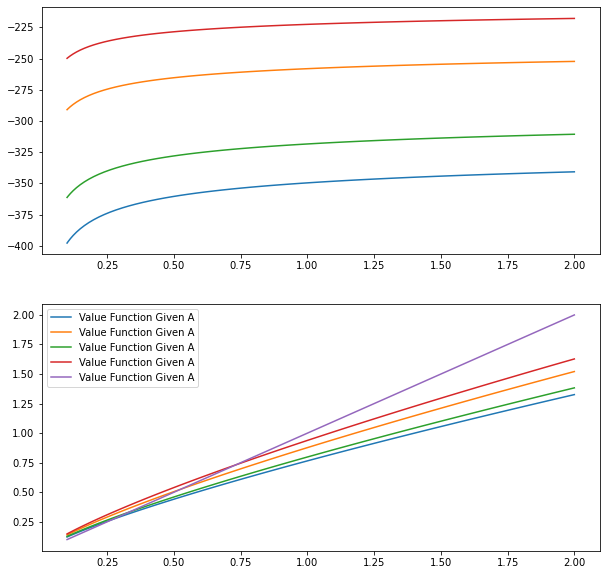

In [8]:
fig, ax  = plt.subplots(2, figsize=(10,10))
ax[0].plot(K, V_1[3,:], label="Value Function Given A")
ax[0].plot(K, V_1[10,:], label="Value Function Given A")
ax[0].plot(K, V_1[5,:], label="Value Function Given A")
ax[0].plot(K, V_1[14,:], label="Value Function Given A")
ax[1].plot(K, h_int[3,:], label="Value Function Given A")
ax[1].plot(K, h_int[10,:], label="Value Function Given A")
ax[1].plot(K, h_int[5,:], label="Value Function Given A")
ax[1].plot(K, h_int[14,:], label="Value Function Given A")
ax[1].plot(K, K, label="Value Function Given A")
plt.legend()
plt.show()